<a href="https://colab.research.google.com/github/edasaruhan/FTL_Ethiopia_ML1_Gr7/blob/main/FTL_Assigmen_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
# Importing libraries
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("ruhulaminsharif/eye-disease-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/eye-disease-image-dataset


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasethenok","key":"cdd99667d60c74d31d1c02209768f571"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ruhulaminsharif/eye-disease-image-dataset



Dataset URL: https://www.kaggle.com/datasets/ruhulaminsharif/eye-disease-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
!unzip -q eye-disease-image-dataset.zip -d ./new_data


replace ./new_data/Augmented Dataset/Augmented Dataset/Central Serous Chorioretinopathy-Color Fundus/CSCR1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls /content
!ls /content/data


data  eye-disease-image-dataset.zip  kaggle.json  new_data  sample_data
'Augmented Dataset'  'Original Dataset'


In [ ]:
import os

data_path = '/content/data'

# Check if directory exists
if os.path.exists(data_path):
    print("Directory exists:", data_path)
else:
    print("Directory does not exist:", data_path)

# List files in directory
files = os.listdir(data_path)
print("Files in directory:", files)


Directory exists: /content/data
Files in directory: ['Augmented Dataset', 'Original Dataset']


In [ ]:
import os

data_path = '/content/data'

# List contents of 'Augmented Dataset'
augmented_path = os.path.join(data_path, 'Augmented Dataset')
if os.path.exists(augmented_path):
    print("Files in 'Augmented Dataset':", os.listdir(augmented_path))

# List contents of 'Original Dataset'
original_path = os.path.join(data_path, 'Original Dataset')
if os.path.exists(original_path):
    print("Files in 'Original Dataset':", os.listdir(original_path))


Files in 'Augmented Dataset': ['Augmented Dataset']
Files in 'Original Dataset': ['Original Dataset']


In [ ]:
!ls /content/data/'Augmented Dataset'
!ls /content/data/'Original Dataset'


'Augmented Dataset'
'Original Dataset'


Data shape: (3411, 224, 224, 3), Labels: 3411


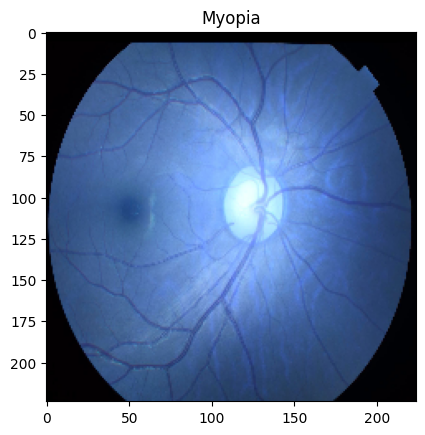

In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder_path, image_size=(224, 224), max_per_class=200):
    X, y = [], []
    for root, dirs, files in os.walk(folder_path):
        # Process only if the current directory contains files (assume these are images)
        label = os.path.basename(root)  # Use the folder name as the label
        if files:  # If the folder contains files
            count = 0
            for file in files:
                if count >= max_per_class:
                    break
                img_path = os.path.join(root, file)
                try:
                    img = cv2.imread(img_path)
                    if img is None:
                        print(f"Failed to load image: {img_path}")
                        continue
                    img = cv2.resize(img, image_size)
                    X.append(img / 255.0)  # Normalize pixel values
                    y.append(label.strip())  # Label from folder name
                    count += 1
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")
                    continue
    return np.array(X, dtype=np.float32), np.array(y)

# Update the folder_path to point to the root dataset directory
folder_path = '/content/data'
X, y = load_images_from_folder(folder_path)

print(f'Data shape: {X.shape}, Labels: {len(y)}')

# Optional: Display the first loaded image and label
if len(X) > 0:
    import matplotlib.pyplot as plt
    plt.imshow(X[0])
    plt.title(y[0])
    plt.show()



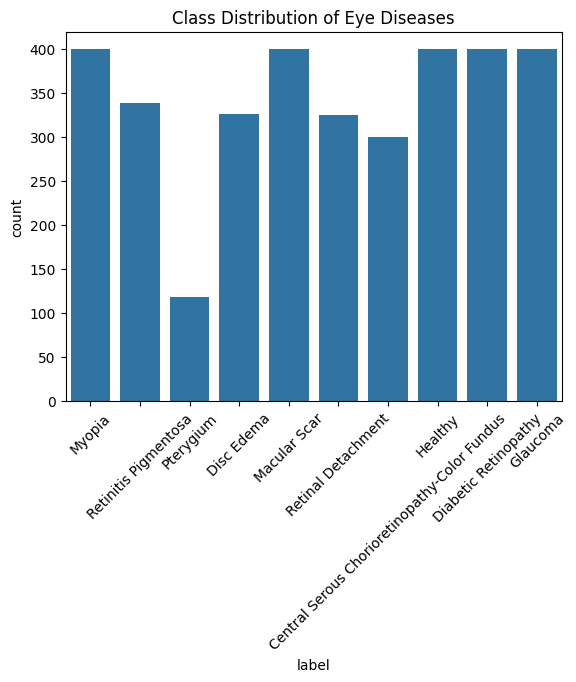

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'label': y})
sns.countplot(data=df, x='label')
plt.title('Class Distribution of Eye Diseases')
plt.xticks(rotation=45)
plt.show()


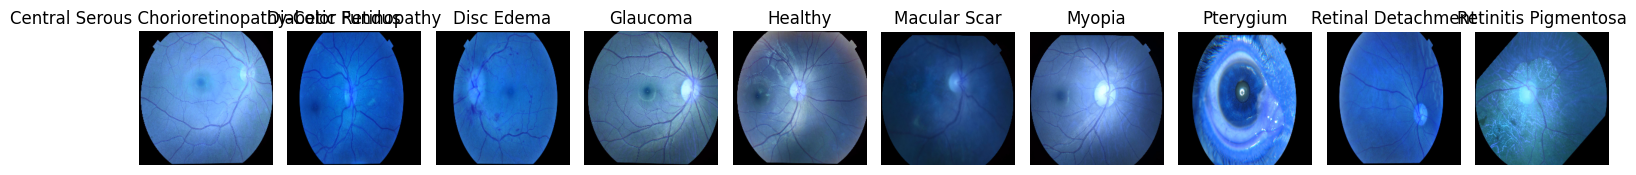

In [ ]:
unique_labels = np.unique(y)
fig, axes = plt.subplots(1, len(unique_labels), figsize=(15, 4))
for idx, label in enumerate(unique_labels):
    img = X[np.where(y == label)[0][0]]
    axes[idx].imshow(img)
    axes[idx].set_title(label)
    axes[idx].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y_cat, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.1574 - loss: 3.0578 - val_accuracy: 0.2418 - val_loss: 2.0454
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.2575 - loss: 2.0224 - val_accuracy: 0.3278 - val_loss: 1.8571
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.3273 - loss: 1.8202 - val_accuracy: 0.3645 - val_loss: 1.6674
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.3725 - loss: 1.6871 - val_accuracy: 0.4377 - val_loss: 1.6022
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.4454 - loss: 1.5269 - val_accuracy: 0.4597 - val_loss: 1.5059
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.4866 - loss: 1.4534 - val_accuracy: 0.4689 - val_loss: 1.5160
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.5095 - loss: 1.3699 - val_accuracy: 0.4853 - val_loss: 1.4420
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.5410 - loss: 1.3412 - val_accuracy: 0.4817 - v

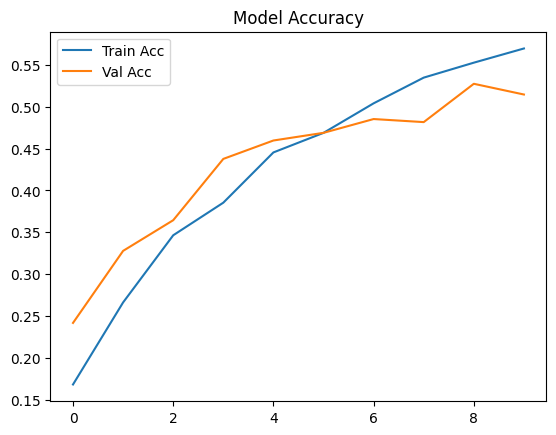

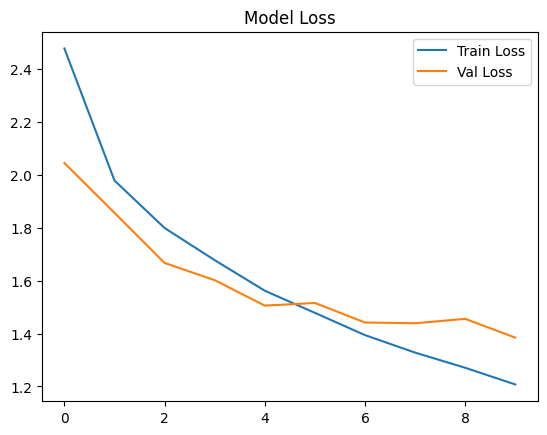

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step
Classification Report:
                                               precision    recall  f1-score   support

Central Serous Chorioretinopathy-Color Fundus       0.39      0.35      0.37        60
                         Diabetic Retinopathy       0.52      0.60      0.56        80
                                   Disc Edema       0.65      0.68      0.67        66
                                     Glaucoma       0.37      0.46      0.41        80
                                      Healthy       0.35      0.29      0.32        80
                                 Macular Scar       0.35      0.30      0.32        80
                                       Myopia       0.56      0.50      0.53        80
                                    Pterygium       1.00      1.00      1.00        24
                           Retinal Detachment       0.77      0.83      0.80        65
                         Retinitis Pigmentosa       0.78      0.76 

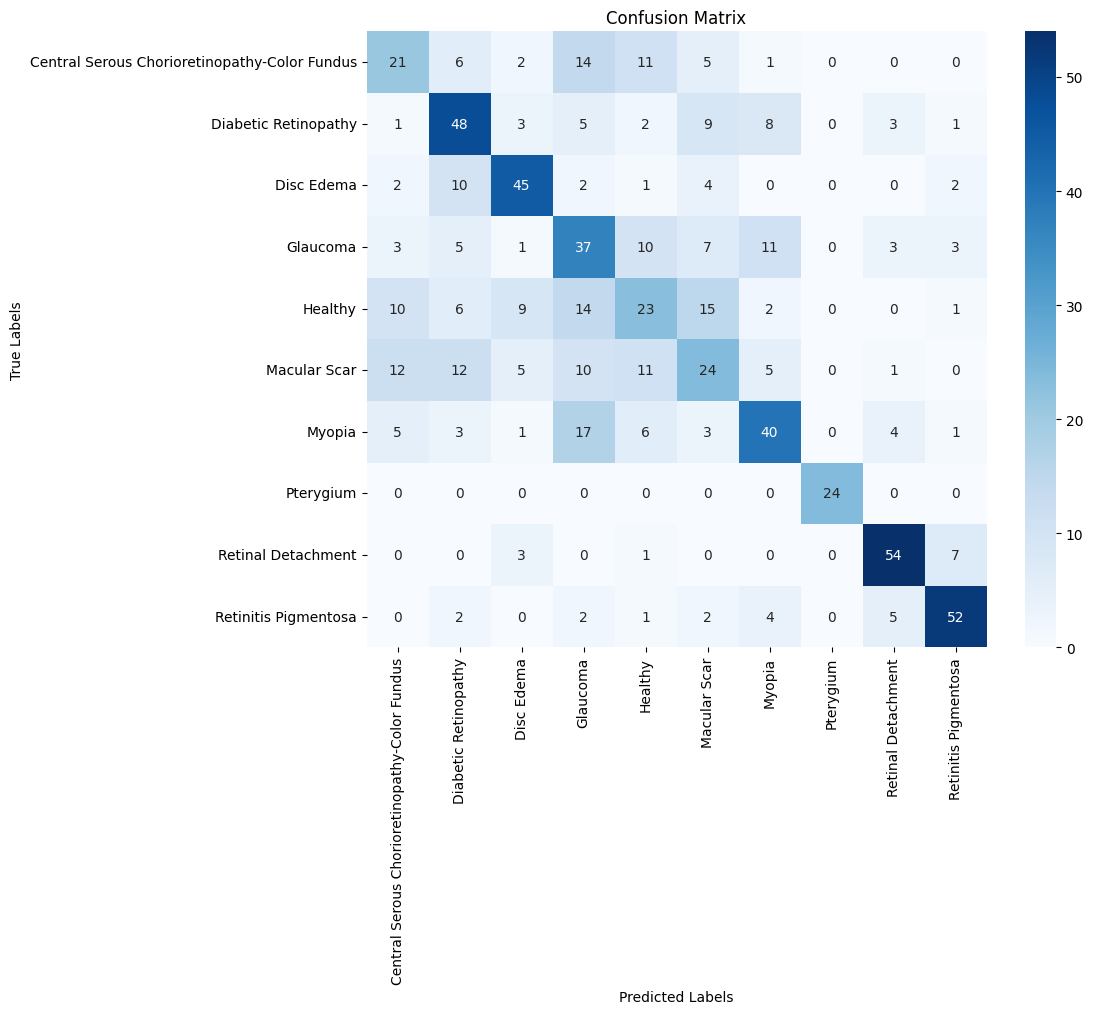

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Convert predictions and true labels to class indices
# Use np.argmax if one-hot encoding is applied
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes
y_true = np.argmax(y_test, axis=1)          # True classes

# Print a classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
